<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


### Loading the Dataset

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv('dataset.csv')

In [30]:
print("First 5 rows of the DataFrame:")
df.head()

First 5 rows of the DataFrame:


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


### Handling Missing Values 

In [31]:
# Task 1: Identify columns with missing values
missing_columns = df.columns[df.isnull().any()]  # Columns with at least one missing value
print("Columns with missing values:", list(missing_columns))

Columns with missing values: ['tax']


In [32]:
# Task 2: Replace missing values with the mean of the column
for column in missing_columns:
    mean_value = df[column].mean()  # Calculate the mean of the column
    df[column].fillna(mean_value, inplace=True) 
print("\nDataFrame after replacing missing values with mean:")
df

<ipython-input-32-7a0d633e7c32>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)



DataFrame after replacing missing values with mean:


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150.0,47.1,1.4,8999
17962,B-MAX,2014,Manual,40700,Petrol,30.0,57.7,1.0,7499
17963,Focus,2015,Manual,7010,Diesel,20.0,67.3,1.6,9999
17964,KA,2018,Manual,5007,Petrol,145.0,57.7,1.2,8299


In [33]:
# Task 3: Delete duplicate entries from the DataFrame
df.drop_duplicates(inplace=True)  # Remove duplicate rows

print("\nDataFrame after removing duplicate entries:")
df


DataFrame after removing duplicate entries:


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150.0,47.1,1.4,8999
17962,B-MAX,2014,Manual,40700,Petrol,30.0,57.7,1.0,7499
17963,Focus,2015,Manual,7010,Diesel,20.0,67.3,1.6,9999
17964,KA,2018,Manual,5007,Petrol,145.0,57.7,1.2,8299


# Exploratory Data Analysis

### Heatmap Correlation

In [36]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Extract correlation values with the target attribute 'price'
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)

# Exclude the target attribute itself (price) and get the top 5 attributes
top_5_attributes = correlation_with_price[1:6]  # Exclude 'price' (index 0)

# Print the top 5 attributes with the highest correlation to 'price'
print("Top 5 attributes with the highest correlation to 'price':")
top_5_attributes

Top 5 attributes with the highest correlation to 'price':


year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64

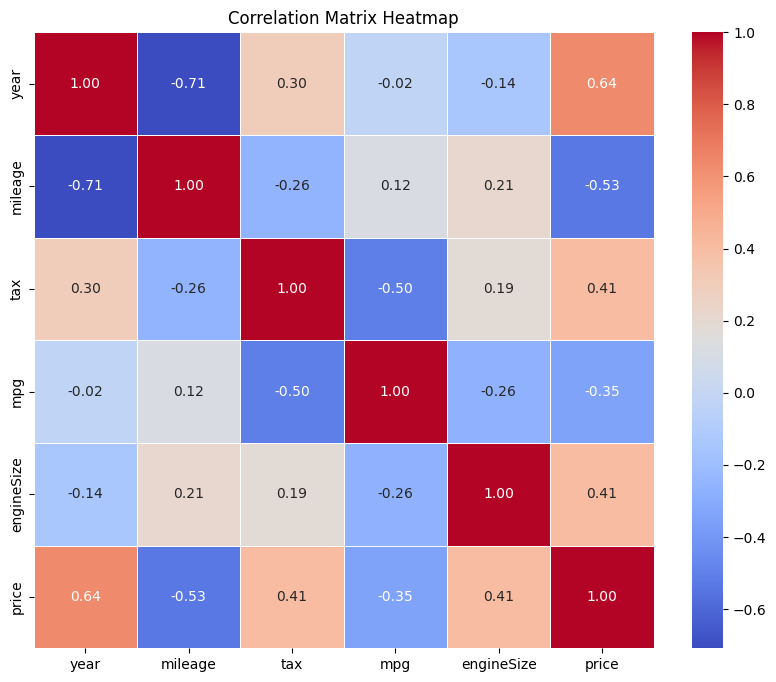

In [37]:
# Visualization 1: Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Count Plot

In [38]:

# Count the number of cars for each unique value of 'fuelType'
fuel_type_counts = df['fuelType'].value_counts()

# Print the result
print("Number of cars for each fuel type:")
print(fuel_type_counts)

Number of cars for each fuel type:
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


<ipython-input-39-c57025e9f792>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette='viridis')


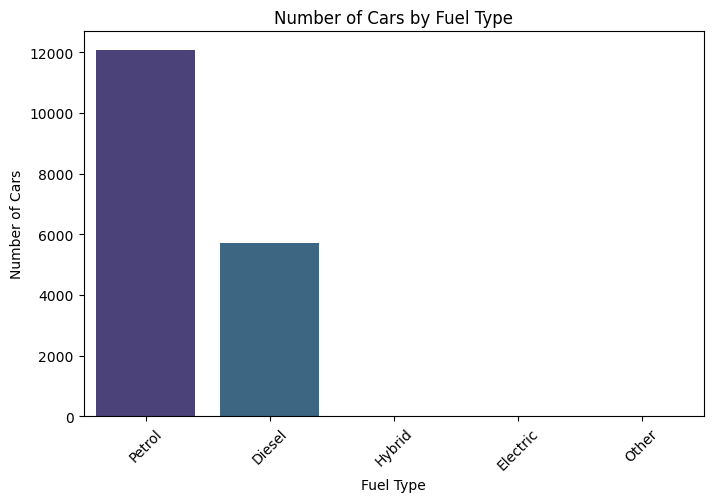

In [39]:


# Create a bar plot for fuel type counts
plt.figure(figsize=(8, 5))
sns.barplot(x=fuel_type_counts.index, y=fuel_type_counts.values, palette='viridis')
plt.title('Number of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.show()

#### To create a box plot that determines whether cars with automatic, manual, or semi-auto transmission types have more price outliers

<ipython-input-41-00adae74a0ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='price', data=df, palette='Set2')


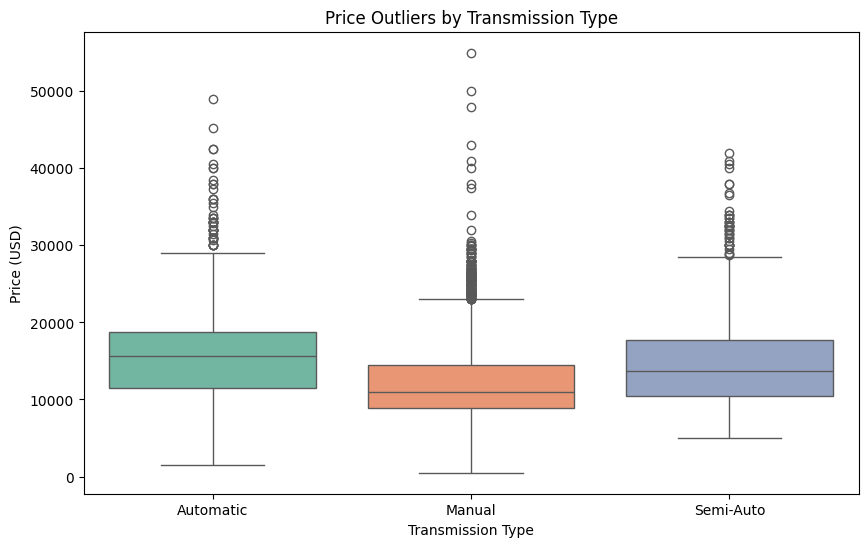

In [41]:
# Create a box plot to compare price outliers by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df, palette='Set2')
plt.title('Price Outliers by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price (USD)')
plt.show()

### Regression Plot

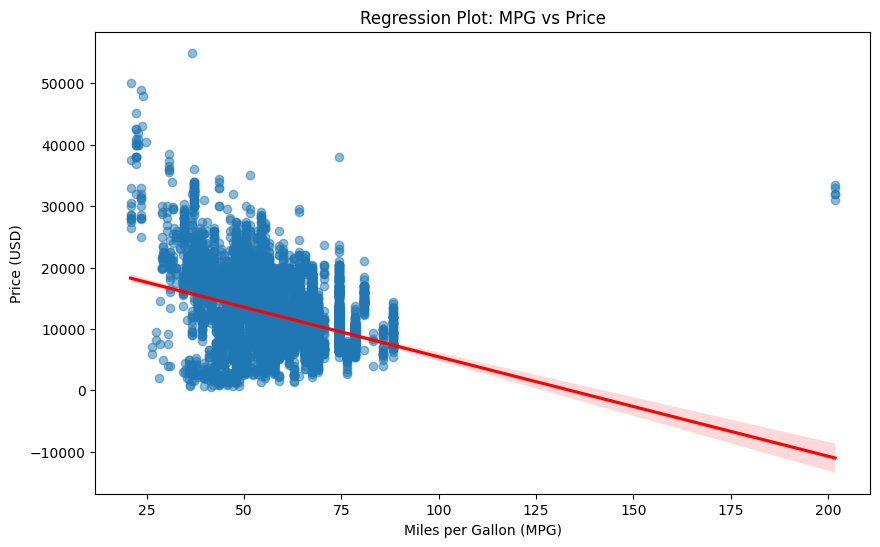

In [42]:

# Create a regression plot between 'mpg' and 'price'
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=df, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Regression Plot: MPG vs Price')
plt.xlabel('Miles per Gallon (MPG)')
plt.ylabel('Price (USD)')
plt.show()

# Model Development and Evaluation

### Linear regression Model

In [43]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare the data
X = df[['mpg']]  # Feature (independent variable)
y = df['price']  # Target (dependent variable)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Linear Regression Results:")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Linear Regression Results:
R^2 Score: 0.1504
Mean Squared Error (MSE): 19049855.14


### Multiple Linear Regression

In [44]:
# Prepare the data
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']  # List of features
X = df[features]  # Features (independent variables)
y = df['price']  # Target (dependent variable)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Linear Regression Results with Multiple Features:")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Linear Regression Results with Multiple Features:
R^2 Score: 0.6917
Mean Squared Error (MSE): 6912744.91


### 2nd Degree Polynomial 

In [47]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Prepare the data
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']  # List of features
X = df[features]  # Features (independent variables)
y = df['price']  # Target (dependent variable)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler, PolynomialFeatures, and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('poly', PolynomialFeatures(degree=2)),  # Step 2: Create second-degree polynomial features
    ('linear_reg', LinearRegression())  # Step 3: Fit a linear regression model
])

# Fit the pipeline model to the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Pipeline Model Results with Polynomial Features:")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

Pipeline Model Results with Polynomial Features:
R^2 Score: 0.1212
Mean Squared Error (MSE): 19704749.61


### Ridge Regression

In [48]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Prepare the data
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']  # List of features
X = df[features]  # Features (independent variables)
y = df['price']  # Target (dependent variable)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model with alpha = 0.1
ridge_model = Ridge(alpha=0.1)  # Regularization parameter alpha = 0.1
ridge_model.fit(X_train, y_train)  # Fit the model to the training data

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Print the R^2 score
print("Ridge Regression Results:")
print(f"R^2 Score: {r2:.4f}")

Ridge Regression Results:
R^2 Score: 0.6917


###  second-order polynomial transform fit Ridge Regression

In [49]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Prepare the data
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']  # List of features
X = df[features]  # Features (independent variables)
y = df['price']  # Target (dependent variable)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform second-order polynomial transform on training and testing data
poly = PolynomialFeatures(degree=2)  # Second-order polynomial features
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)  # Transform testing data

# Create and fit a Ridge regression model with alpha = 0.1
ridge_model = Ridge(alpha=0.1)  # Regularization parameter alpha = 0.1
ridge_model.fit(X_train_poly, y_train)  # Fit the model to the polynomial training data

# Predict on the polynomial test set
y_pred = ridge_model.predict(X_test_poly)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Ridge Regression Results with Polynomial Features:")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression Results with Polynomial Features:
R^2 Score: 0.6733
Mean Squared Error (MSE): 7326174.52


### Grid Search  with 4-fold cross-validation

In [50]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Prepare the data
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']  # List of features
X = df[features]  # Features (independent variables)
y = df['price']  # Target (dependent variable)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform second-order polynomial transform on training and testing data
poly = PolynomialFeatures(degree=2)  # Second-order polynomial features
X_train_poly = poly.fit_transform(X_train)  # Transform training data
X_test_poly = poly.transform(X_test)  # Transform testing data

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create a Ridge regression model
ridge_model = Ridge()

# Perform Grid Search with 4-fold cross-validation
grid_search = GridSearchCV(ridge_model, param_grid, cv=4, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Optimum alpha value: {best_alpha}")

# Use the best model to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_poly)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print("Ridge Regression Results with Grid Search and Polynomial Features:")
print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-24): res

Optimum alpha value: 0.01
Ridge Regression Results with Grid Search and Polynomial Features:
R^2 Score: 0.3827
Mean Squared Error (MSE): 13840985.12


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
